In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# reading data
df = pd.read_csv('/content/GPUbenchmark.csv', header = None)
# droping last column for X
X = df.drop(columns=6)
# Creating response y
y = df.iloc[:, 6]
mean_col = X.mean(axis=0)
std_col = X.std(axis=0)

1. Start by normalizing X using Xn = (X 􀀀 )=.

In [ ]:
#normalizing the X matrix
X_columns = list(X.columns)
for i in X_columns:
  X[i] = (X[i] - mean_col[i]) / std_col[i]

2. Multivariate datasets are hard to visualize. However, to get a basic understanding it might
be a good idea to produce a plot Xi vs y for each one of the features. Use subplot(2,3,i)
to fit all six plots into a single figure. Make sure that each nomalized Xi is centralized
around zero.

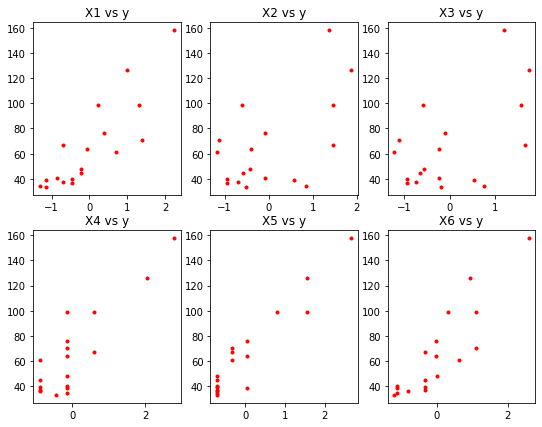

In [ ]:
fig, axs = plt.subplots(2, 3,figsize=(9,7))
axs[0, 0].plot(X[0], y,'r.')
axs[0, 0].set_title('X1 vs y')
axs[0, 1].plot(X[1] , y, 'r.')
axs[0, 1].set_title('X2 vs y')
axs[0, 2].plot(X[2] , y, 'r.')
axs[0, 2].set_title('X3 vs y')
axs[1, 0].plot(X[3] , y, 'r.')
axs[1, 0].set_title('X4 vs y')
axs[1, 1].plot(X[4] , y, 'r.')
axs[1, 1].set_title('X5 vs y')
axs[1, 2].plot(X[5] , y, 'r.')
axs[1, 2].set_title('X6 vs y')

plt.show()

In [ ]:
# extended normalized matrix
X_e = pd.concat([pd.Series(1, index=df.index, name='00'), X], axis=1)

beta = np.dot(np.dot(np.linalg.inv(np.dot(X_e.transpose(),X_e)),X_e.transpose()),y)
print("Beta vector : ")
print(beta)

Beta vector : 
[65.18888889 18.57923492 -5.50734017 13.42323997  4.31736755 10.33111663
  1.29911163]


In [ ]:
test = [2432, 1607, 1683, 8, 8, 256]
normalize_test = (test-mean_col)/std_col
print("Predicted benchmark result for a graphic card with feature values : [2432, 1607, 1683, 8, 8, 256] is ")
print(np.dot(list([1])+list(normalize_test),beta))

Predicted benchmark result for a graphic card with feature values : [2432, 1607, 1683, 8, 8, 256] is 
110.80403513783283


In [ ]:
def computeCost(X_e, beta, y):
    j = np.dot(X_e,beta)-y
    cost_func = np.dot(j.transpose(),j)/len(j)
    return cost_func
print("Total Cost: ", computeCost(X_e, beta, y))

Total Cost:  12.396444360915686


In [ ]:
def gradient_descent(X, y, N = 10000, lr = 0.001, epsilon = 0.00001):
    m, n = X.shape
    beta = np.zeros(n)
    cost_ = []
    for iter in range(N):
        beta1 = beta -lr*(np.dot(X.transpose(),np.dot(X,beta)-y))
        cost_.append(computeCost(X, beta1, y))
        if(np.linalg.norm(beta1-beta) < epsilon):
            return beta1, cost_
        beta = beta1
    
    return beta, cost_

In [ ]:
N, lr = 10000, 0.001
grad_descent_beta, cost_hist = gradient_descent(X_e,y)
print("Hyperparameters :\n -- Number of iterations, N : {}\n -- Leraning Rate, lr : {}".format(N,lr))
print("Beta after gradient descent : ", grad_descent_beta)

Hyperparameters :
 -- Number of iterations, N : 10000
 -- Leraning Rate, lr : 0.001
Beta after gradient descent :  [65.18888889 18.3120956  -2.57610284 10.59741387  4.04838359 10.47561515
  1.50365165]


Predicted benchmark result for a graphic card with feature values : [2432, 1607, 1683, 8, 8, 256] is 
111.76301273074311
Total Cost:  12.50959524895206


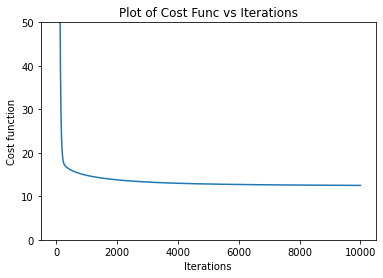

In [ ]:
print("Predicted benchmark result for a graphic card with feature values : [2432, 1607, 1683, 8, 8, 256] is ")
print(np.dot(list([1])+list(normalize_test),grad_descent_beta))
print("Total Cost: ", computeCost(X_e, grad_descent_beta, y))
plt.plot(cost_hist)
plt.ylim([0,50])
plt.title("Plot of Cost Func vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.show()